In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib import colors
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import scipy as sp
from scipy.integrate import odeint,quad,simps,trapezoid,cumtrapz
from scipy.special import eval_hermite,eval_hermitenorm,erfinv
from scipy.misc import derivative
from math import sqrt,sin,pi,cos,exp,log,factorial
from scipy.spatial import KDTree
from IPython.core.display import display, HTML
import sys
sys.path.append(r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/repository')
figures_route = r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/MSc Project - Latex/Figures/'
from nonparametric_generator import *
import tikzplotlib
import matplotlib
def pgf_switch(setting = 'off'):
    if setting == 'off':
        matplotlib.use('module://ipykernel.pylab.backend_inline')
        matplotlib.rcParams.update({
            "pgf.texsystem": "xelatex",
            'font.family': ['sans-serif'],
            'text.usetex': False,
            'pgf.rcfonts': True,
        })
    else:
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'font.family': 'serif',
            'text.usetex': True,
            'pgf.rcfonts': False,
        })
display(HTML("<style>.container { width:95% !important; }</style>"))

# Estimation of the operator $\mathcal{L}$

### 0. Data Simulation Euler–Maruyama method
$$dX_t = -X_t dt + \sqrt{2D}dW_t$$


In [2]:
def sim_sde(D=1,n=100000,dt = 0.0001):
    W = np.random.normal(loc=0,scale=np.sqrt(dt),size=(n,2))
    Z = np.zeros((n,2))
    Z[0,...] = 0
    for i in range(1,n):
        Z_1 = Z[i-1,...]
        Z[i,...] = Z_1 - Z_1*dt + np.sqrt(2*D) * W[i,:]
    return(Z)

In [3]:
n = int(2e7)
dt = 5e-3
T = n*dt
D = 1
np.random.seed(1)
X = sim_sde(D=D,n=n,dt=dt)
# X = np.random.normal(0,np.sqrt(D),size=(n,2))

In [4]:
N = 10000
np.random.seed(1)
X_s = X[np.random.choice(range(n),size=N),:]

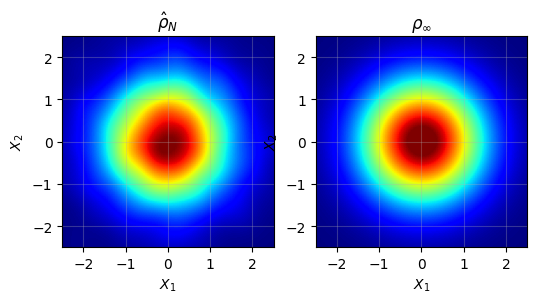

In [5]:
g_kde  = sp.stats.gaussian_kde(X_s.T,0.25)
def rho_inf(x,y,D):
    norm = x**2 + y**2
    frac = 1 / (2*pi*D)
    expo = np.exp(-(x**2+y**2)/(2*D))
    return frac * expo
x = np.linspace(-2.5, 2.5, 120)
y = np.linspace(-2.5, 2.5, 120)
r1 = np.zeros((120,120))
for i,_x in enumerate(x):
    for j,_y in enumerate(x):
        r1[i,j] = g_kde([_x,_y])[0]
X1, X2 = np.meshgrid(x, y)
r2 =rho_inf(X1,X2,D)

fig,axs = plt.subplots(1,2,figsize=(6,3),dpi=100)
axs[0].imshow(r1,extent=[-2.5,2.5,-2.5,2.5],cmap='jet',norm = colors.Normalize(vmin=0, vmax=0.15))
axs[0].set_xlabel('$X_1$')
axs[0].set_ylabel('$X_2$')
axs[0].set_title("$\\hat{\\rho}_N$")
axs[0].grid(alpha=0.3)

axs[1].imshow(r2,extent=[-2.5,2.5,-2.5,2.5],cmap='jet',norm = colors.Normalize(vmin=0, vmax=0.15))
axs[1].set_title("$\\rho_{\infty}$")
axs[1].set_xlabel('$X_1$')
axs[1].set_ylabel('$X_2$')
axs[1].grid(alpha=0.3)

epsilon = 7.92e-03
d = 1.96


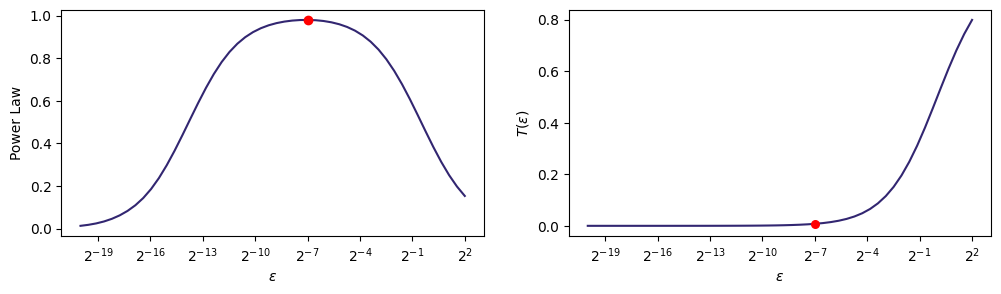

In [6]:
epsilon, d = bandwidth_search(X_s,plot=True,verbose=True)

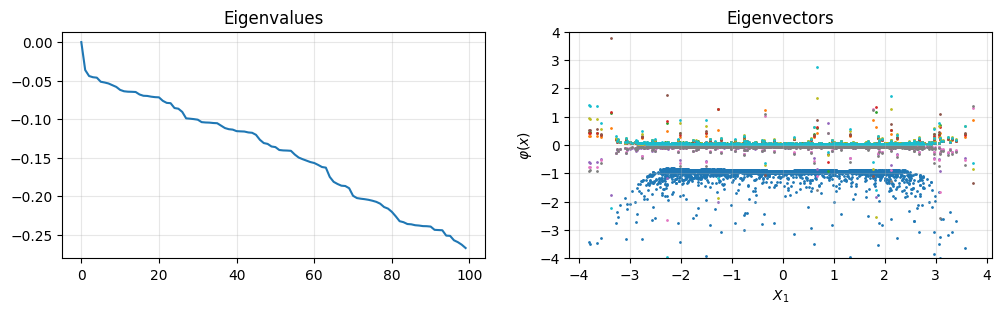

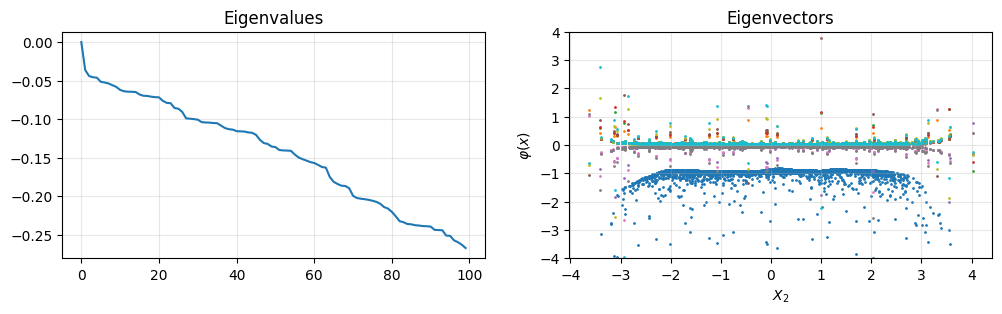

In [7]:
l, phi,L_e, U = KNPGenerator(X_s,M=100,plot=True,return_extra=True,epsilon=epsilon,d=d,epsilon_0 = 0.25)
phi_1 = np.linalg.pinv(phi)

\begin{align*}
\mathcal{L} f(x,y) &= -\frac{\partial}{\partial x} f(x,y)-\frac{\partial}{\partial y}f(x,y) + D\Delta f (x,y)
\end{align*}


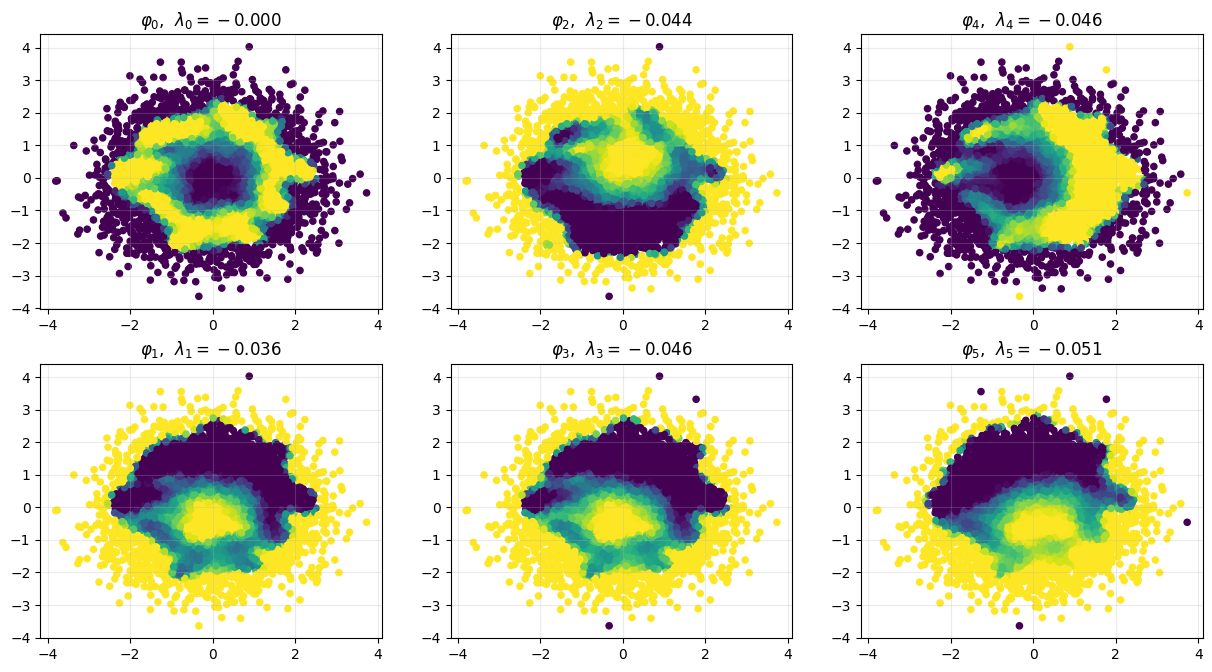

In [8]:
fig,axs = plt.subplots(2,3,figsize=(15,8),dpi=100)
for i,elle in enumerate(range(6)):
    axs[i%2,int(i / 2)].set_title(f"$\\varphi_{i}$,  $ \lambda_{i} = {l[i]:.3f}$")
    axs[i%2,int(i / 2)].scatter(X_s[:,0],X_s[:,1],s=20,c=U[:,i],
                                norm = colors.Normalize(vmin=np.quantile(U[:,i],0.2), vmax=np.quantile(U[:,i],0.8)))
    axs[i%2,int(i / 2)].grid(alpha=0.25)

$$f(x,y) = e^{-(x^2+y^2)}$$


\begin{align*}
\mathcal{L} f(x,y) &= 2x e^{-x^2 - y^2} +2y e^{-x^2 - y^2} + D(x^2 + y^2-1)(4 e^{-x^2 - y^2} )
\end{align*}

In [9]:
x = np.linspace(-3.5, 3.5, 180)
y = np.linspace(-3.5, 3.5, 180)
X1, X2 = np.meshgrid(x, y)
D = 1

In [10]:
l1,phi1 = np.linalg.eig(L_e)
phi1 = phi1 / np.linalg.norm(phi1,axis=0) * np.sqrt(np.shape(phi1)[1])   
phi_11 = np.linalg.pinv(phi1)

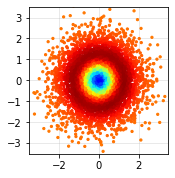

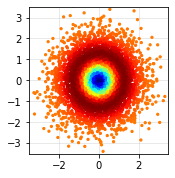

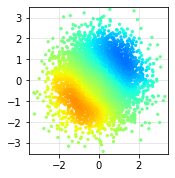

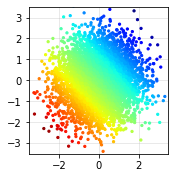

In [11]:
setting = 'off'
pgf_switch(setting)

Lf = lambda x,y :np.exp(-x**2-y**2)* (2*x**2+2*y**2+4*D*(x**2+y**2-1))
r3 = Lf(X1,X2)

Y = np.exp(-np.linalg.norm(X_s,axis=1)**2)
c_coef = (D/N)* Y @ phi
c_coef1 = (D) * phi_11 @ Y

plt.figure(figsize=(2.5,2.7))
plt.scatter(X_s[::2,0],X_s[::2,1],s=5,c=np.sum((c_coef1*l1) * phi1,axis=1)[::2],cmap='jet',norm = colors.Normalize(vmin=np.min(r3), vmax=np.max(r3)),zorder=2)
plt.grid(alpha=0.35,zorder=1)
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
if setting == 'on':
    _ = plt.savefig(figures_route + '2dOUtest_1.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()


plt.figure(figsize=(2.5,2.7))
plt.scatter(X_s[::2,0],X_s[::2,1],s=5,c=Lf(X_s[::2,0],X_s[::2,1]),cmap='jet',
                                norm = colors.Normalize(vmin=np.min(r3), vmax=np.max(r3)),zorder=2)
plt.grid(alpha=0.35,zorder=1)
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
if setting == 'on':
    _ = plt.savefig(figures_route + '2dOUtest_2.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

Lf = lambda x,y : -x - y
r3 = Lf(X_s[:,0],X_s[:,1])

Y = X_s[:,1] + X_s[:,0]
c_coef = (1/N) * (Y @ U)
c_coef1 = (D) * phi_11 @ Y
plt.figure(figsize=(2.5,2.7))

plt.scatter(X_s[::2,0],X_s[::2,1],s=5,c=np.sum((c_coef1*l1) * phi1,axis=1)[::2],cmap='jet',
                                norm = colors.Normalize(vmin=np.min(r3), vmax=np.max(r3)),zorder=2)
plt.grid(alpha=0.35,zorder=1)
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
if setting == 'on':
    _ = plt.savefig(figures_route + '2dOUtest_3.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

plt.figure(figsize=(2.5,2.7))

plt.scatter(X_s[::2,0],X_s[::2,1],s=5,c=Lf(X_s[::2,0],X_s[::2,1]),cmap='jet',
                                norm = colors.Normalize(vmin=np.min(r3), vmax=np.max(r3)),zorder=2)

plt.grid(alpha=0.35,zorder=1)

plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
if setting == 'on':
    _ = plt.savefig(figures_route + '2dOUtest_4.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

### 10. Estimate the correlation time $$T_c = \int_{0}^{\infty} C(\tau)C(0)^{-1}d\tau \approx \text{(TR)}\int\frac{1}{T-j}\sum_{i=1}^{T-j}S(x_{i+j})S(x_i) $$

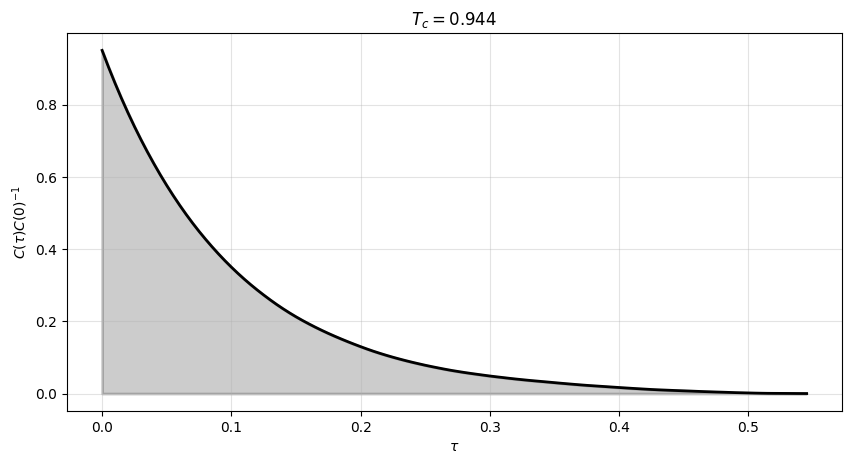

In [12]:
setting = 'off'
pgf_switch(setting)
S = np.sum(X[::10,:] - X[::10,:].mean(axis=0),axis=1)
n = len(S)
C_tau=np.zeros(n)
C0 = (1/n) * np.sum(S**2)
for j in range(1,n):
    if 1/(n-j)*sum(S[:n-j]*S[j:]) > 0:
        C_tau[j] = 1/(n-j)*sum(S[:n-j]*S[j:])
    else:
        break
C_tau = C_tau[C_tau>0]
pv = len(C_tau)
Tc = simps(x=np.linspace(0,n*dt*10,n)[:pv],y= C_tau / C0)

_ = plt.figure(figsize=(10,5),dpi=100)
_ = plt.grid(alpha=0.35)
_ = plt.plot(np.linspace(0,n*dt,n)[:pv],C_tau / C0 ,color='k',lw=2)
_ = plt.fill_between(np.linspace(0,n*dt,n)[:pv],C_tau / C0 ,color='k',lw=2,alpha=0.2)
_ = plt.xlabel('$\\tau$')
_ = plt.ylabel('$C(\\tau) C(0)^{-1}$')
_ = plt.title(f'$T_c = {Tc:.3f}$')

 ### 11. Estimate D as $$D = -\frac{1}{T_c}\frac{\sum_{i=1}^M \lambda_i ^{-1}(S(x)^{\top}\varphi_i)^2}{\sum_{i=1}^M (S(x)^{\top}\varphi_i)^2} $$

In [24]:
S = np.sum(X_s - X_s.mean(axis=0),axis=1)
s1 = np.sum((1/np.sort(l1)[:-1]) * (phi_11[np.argsort(l1),:] @ S)[:-1]**2)
s2 = np.sum((phi_11[np.argsort(l1),:] @ S)[:-1]**2)
D_hat = - (1/Tc)* (s1/s2)
D_hat

2.129868388774379